In [25]:
import pandas as pd
import numpy as np

In [26]:
population = pd.read_excel(r"./data/population_sex_age.xls","Tabl. 15")
population

,WIEK \nAGE,Ogółem Total,Mężczyźni Males,Kobiety Females,Miasta Urban areas,Unnamed: 5,Unnamed: 6,Wieś Rural areas,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,razem total,mężczyźni males,kobiety females,razem total,mężczyźni males,kobiety females
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POLSKA,38265013.0,18502241,19762772.0,22905095,10847013,12058082,15359918,7655228,7704690
3,POLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0–4 lata,1902236.0,976934,925302.0,1116045,573255,542790,786191,403679,382512
...,...,...,...,...,...,...,...,...,...,...
160,Stan w dniu 31 grudnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,POPULATION BY GENDER AND AG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,As of 31st December,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Powrót do spisu tablic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = population.loc[4:125,population.columns[1:4]].reset_index(drop=True)
df.drop(range(0,120,6), inplace=True)
df.drop([121], inplace=True)
df.reset_index(inplace=True, drop=True)
df.columns=[ 'total','male','female']
df = df.astype({'male':int, 'female':int,'total':int})
df

,total,male,female
0,348385,178705,169680
1,373544,191883,181661
2,388334,199867,188467
3,405067,207898,197169
4,386906,198581,188325
...,...,...,...
96,12561,2701,9860
97,9208,2037,7171
98,6285,1389,4896
99,3748,835,2913


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

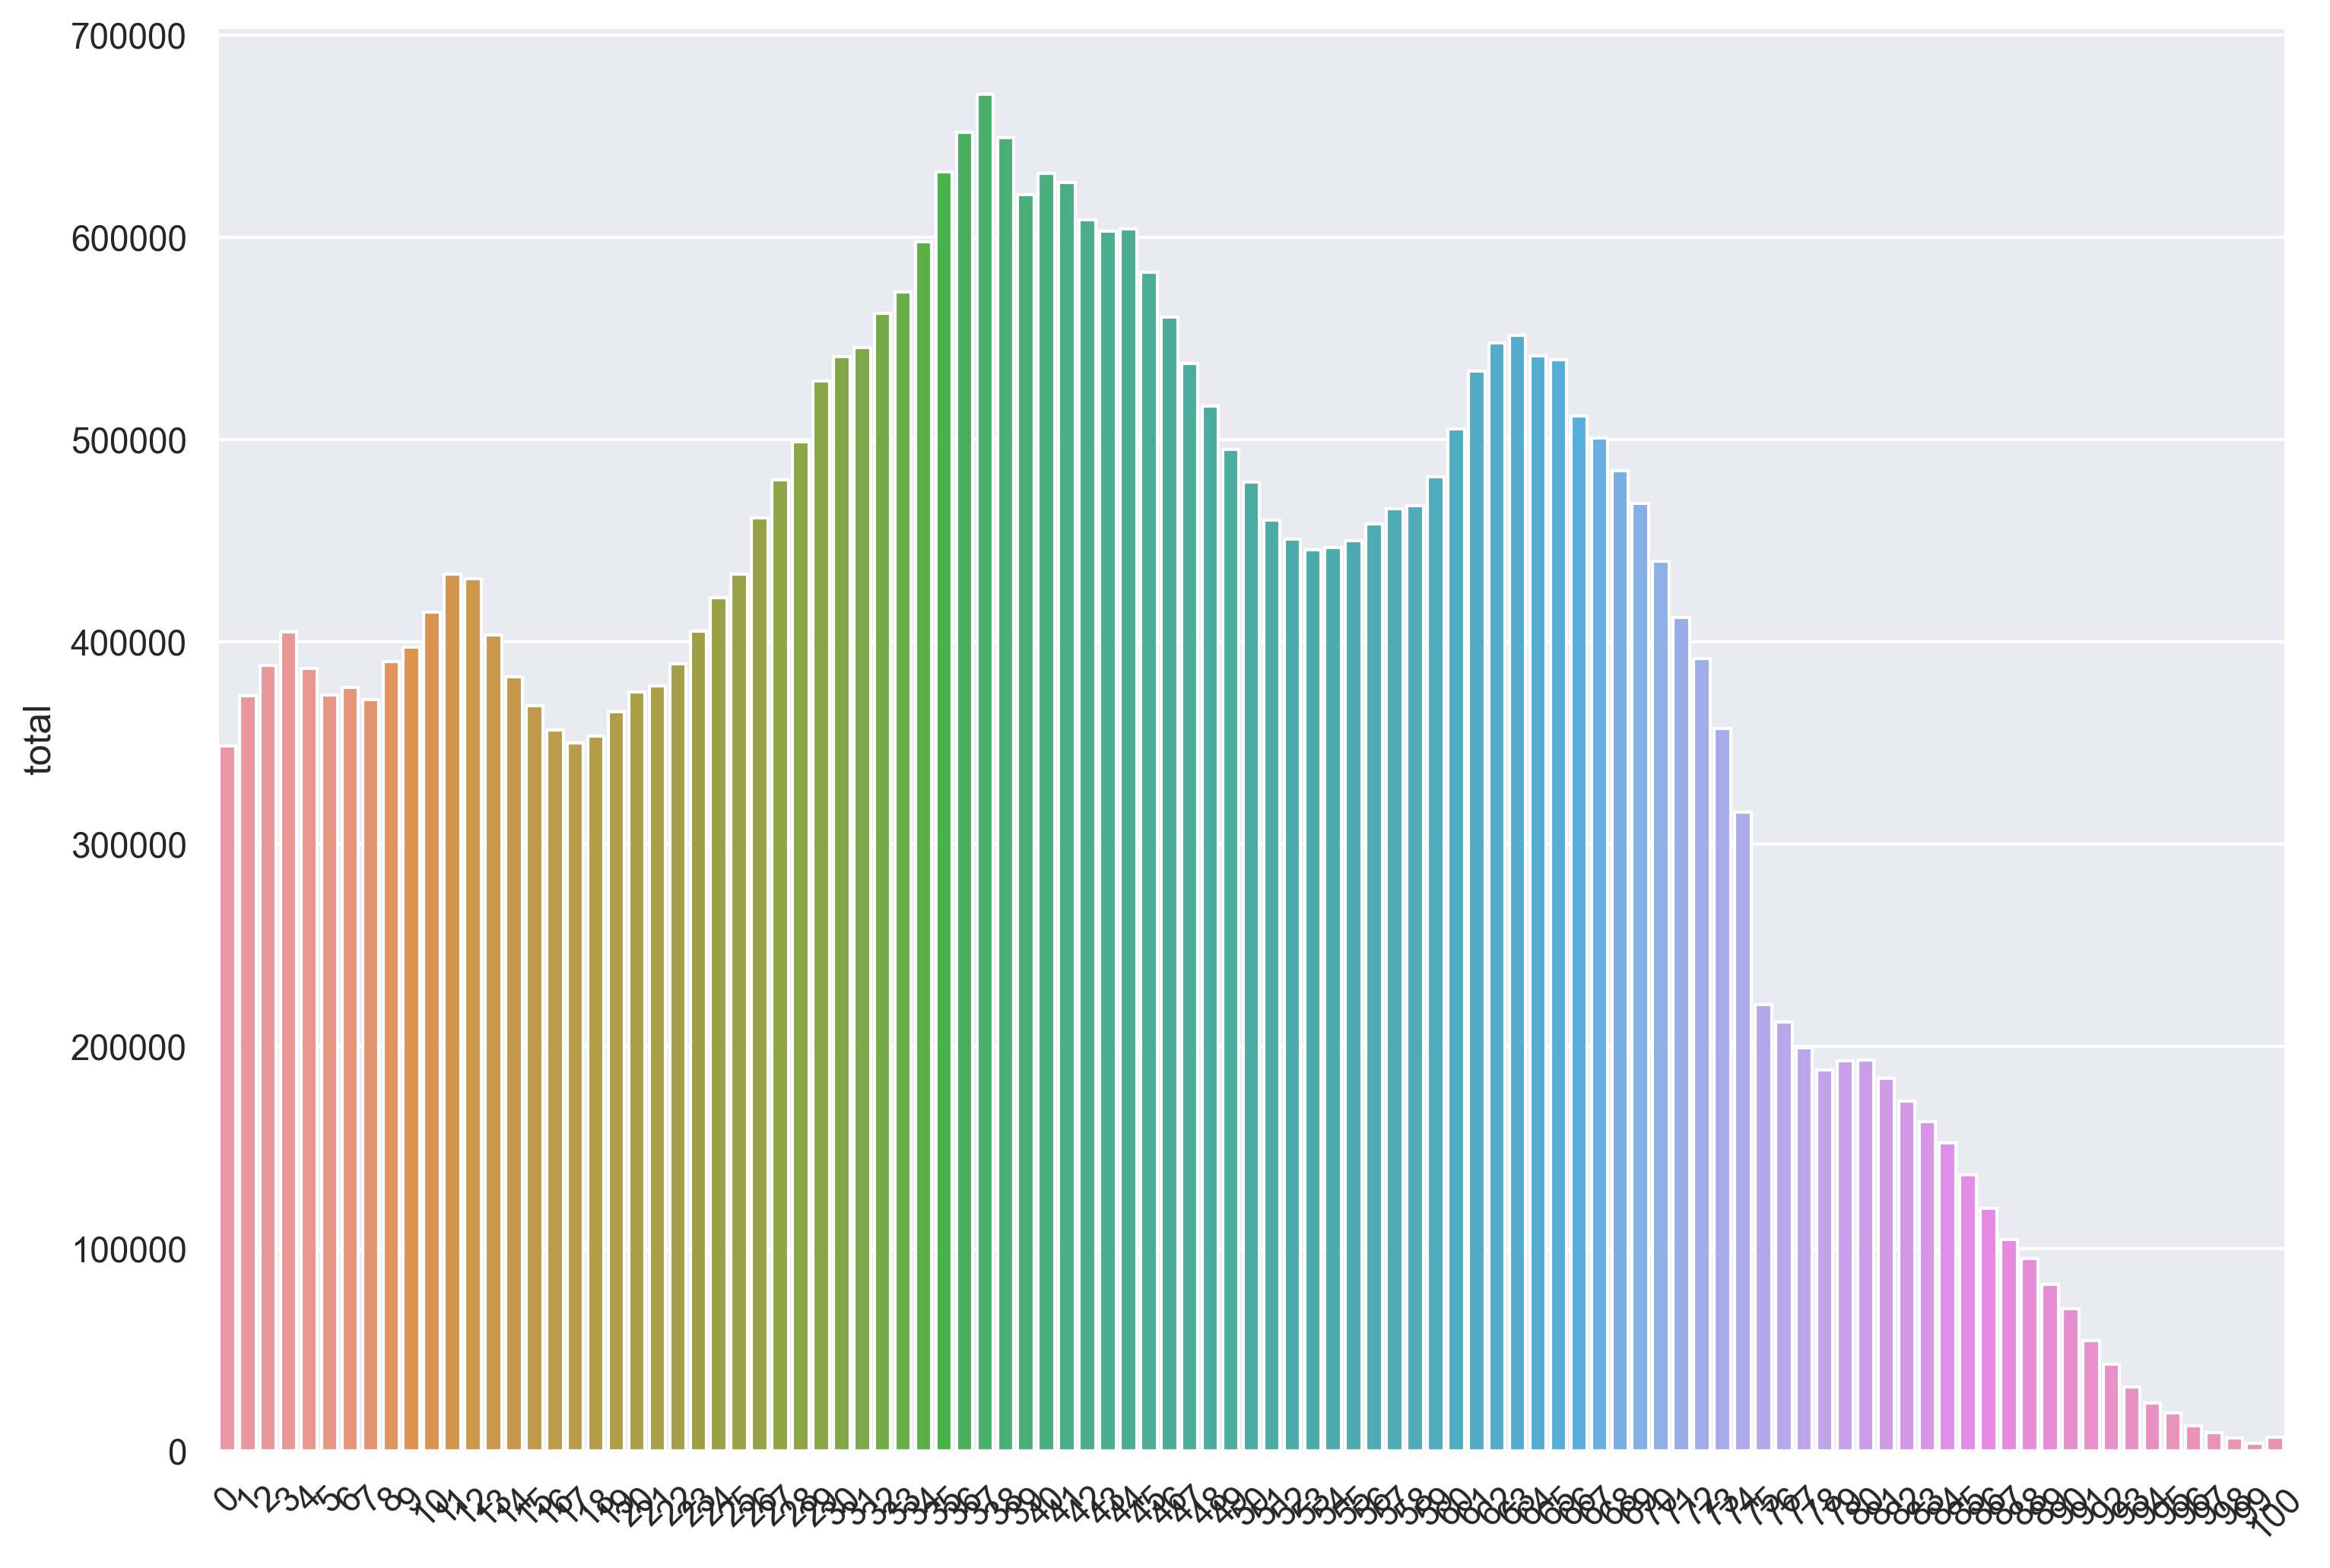

In [29]:
plt.rcParams['figure.dpi'] = 300
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(data=df, x=df.index ,y='total')
g.tick_params(axis='x', rotation=45)

In [31]:
print(df.female.sum()/df.total.sum())
print(df.male.sum()/df.total.sum())

0.5164710645727469
0.4835289354272531


In [32]:
import json

with open("population.json", 'w') as f:
    json.dump({col : df[col].to_list()
                    for col in df.columns}, f)

In [33]:
import pandas as pd
df_dd = pd.DataFrame.from_dict({1: 133253, 4: 333065, 0: 66740, 3: 267009, 2: 199934}, orient='index',columns=['amount'])
df_dd.sort_index(inplace=True)

In [34]:
df_dd['amount']/df_dd['amount'].sum()

0    0.066740
1    0.133253
2    0.199934
3    0.267009
4    0.333065
Name: amount, dtype: float64

In [35]:
pop_df = pd.read_json('./data/population.json')
pop_df

ValueError: Expected object or value